<a href="https://colab.research.google.com/github/EktaKumari2011/CODSOFT/blob/main/TitanicSurvivalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing The dependencies

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

Data collection and processing

In [132]:
titanic_data = pd.read_csv('/content/Titanic-Dataset.csv')

In [133]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
titanic_data.shape
#we have 12 columns and we are intrested in 1 (survival) so we have 11 features and 1 is target column
# 891 rows represent 891 passengers

(891, 12)

In [135]:
titanic_data.info()
# age, embarked and cabin column have many missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [136]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling missing values

In [137]:
#cabin column(most of the data is missing so we will remove the column from dataset beacuse taking mean and all will not be of any help)
titanic_data = titanic_data.drop(columns = 'Cabin', axis=1)
#AXIS used while dropping columns and rows: 0 - rows and 1 - column


In [138]:
#age column(replace with mean age )
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [139]:
#embark column(most ocurred value will be taken to replace)
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [140]:
print(titanic_data['Embarked'].mode()[0])

S


In [141]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace = True)

In [142]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [143]:
# Display the result
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [144]:
bins = [0, 18, 30, 50, 100]  # Define age bins
labels = ['Child', 'Young Adult', 'Adult', 'Senior']  # Define corresponding labels
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=bins, labels=labels, right=False)

In [145]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult


Data Analysis

In [146]:
#statistical measures about data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [147]:
#age and fair are only two columns suitabel for statistical plot
#findinf the number of people survived or not
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [148]:
# Extract family size
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1  # Include the passenger itself

In [149]:
# Display the updated DataFrame
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adult,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult,1


Data visualisation

In [150]:
sns.set()

<ipython-input-151-2f53ec92f4cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=titanic_data,palette=colors)


<Axes: xlabel='Survived', ylabel='count'>

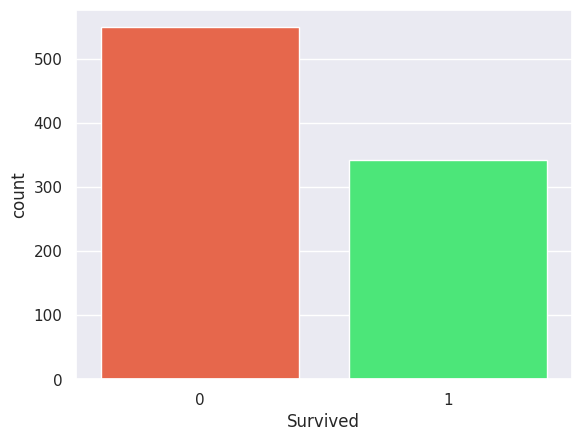

In [151]:
# count plot for survival
colors = ["#FF5733", "#33FF6E"]
sns.countplot(x='Survived', data=titanic_data,palette=colors)

In [152]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<ipython-input-153-d7366b4826d1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=titanic_data,palette=colors)


<Axes: xlabel='Sex', ylabel='count'>

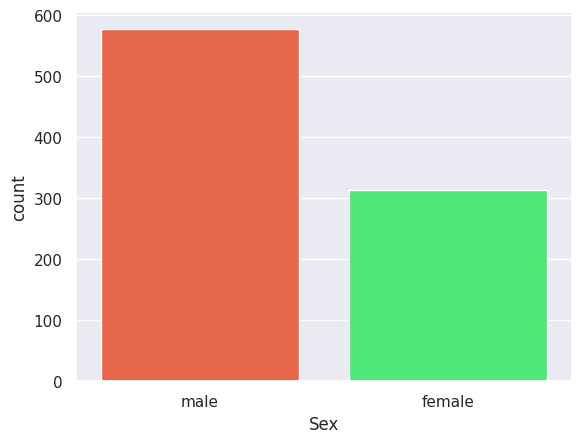

In [153]:
colors = ["#FF5733", "#33FF6E"]
sns.countplot(x='Sex', data=titanic_data,palette=colors)

<Axes: xlabel='Sex', ylabel='count'>

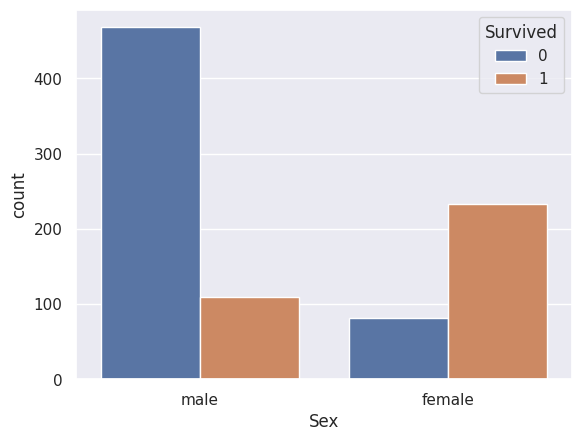

In [154]:
#compare survivals with gender
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

#insights
#females were less in number still were the priorities while escaping ship

<Axes: xlabel='Pclass', ylabel='count'>

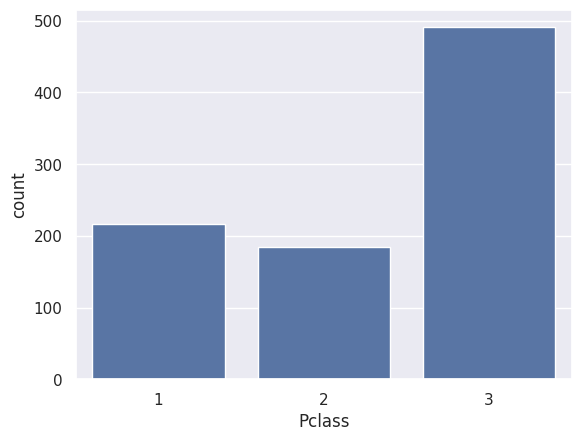

In [155]:
sns.countplot(x='Pclass',data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

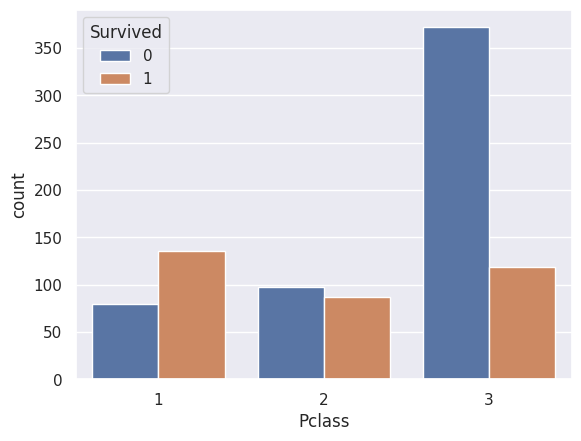

In [156]:
sns.countplot(x='Pclass',hue='Survived',data=titanic_data)

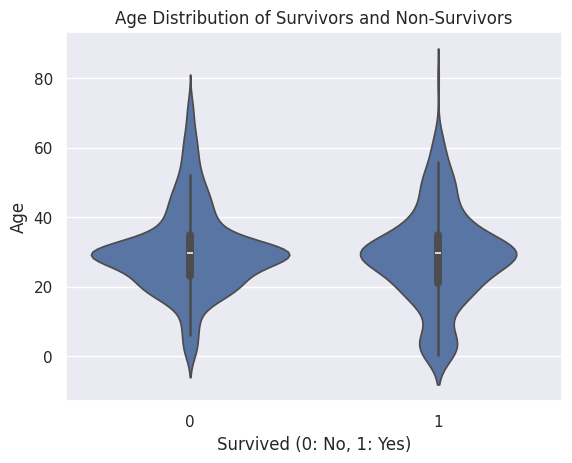

In [157]:
sns.violinplot(x='Survived', y='Age', data=titanic_data)
plt.title('Age Distribution of Survivors and Non-Survivors')
plt.xlabel('Survived (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()

<Axes: xlabel='AgeGroup', ylabel='count'>

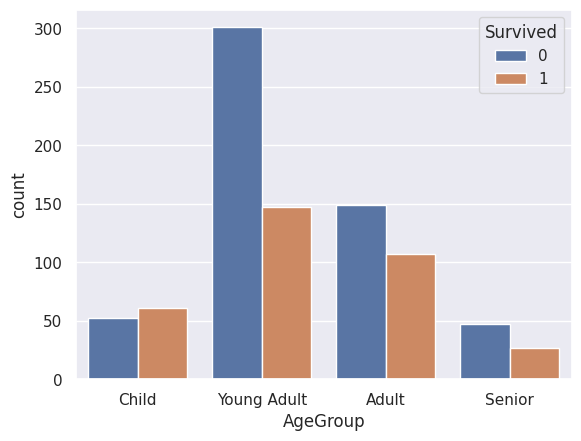

In [158]:
sns.countplot(x='AgeGroup',hue='Survived',data=titanic_data)

<Axes: xlabel='FamilySize', ylabel='count'>

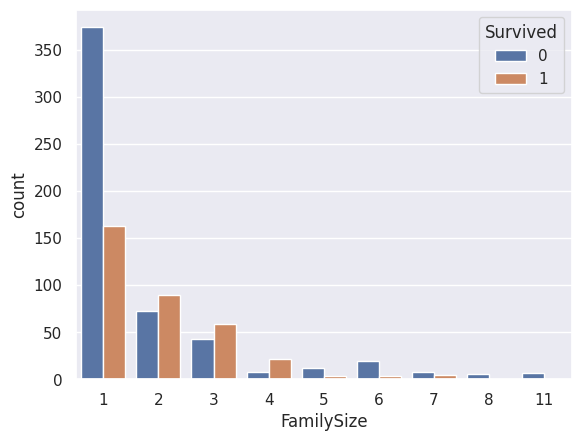

In [159]:
sns.countplot(x='FamilySize',hue='Survived',data=titanic_data)

Encoding and Decoding

In [160]:
# as machine only leanr sfrom numerical values so we will convert categorical columns to numerical
# we will drop name column because it won't give any kind of insight as such


In [161]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [162]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [163]:
#converting
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [164]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,Young Adult,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,Young Adult,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,Adult,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,Adult,1


Seperating feature and target

In [172]:
X= titanic_data.drop(columns=['PassengerId', 'Name' ,'Ticket','Survived','AgeGroup'],axis=1)
Y= titanic_data['Survived']

In [173]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  FamilySize
0         3    0  22.000000      1      0   7.2500         0           2
1         1    1  38.000000      1      0  71.2833         1           2
2         3    1  26.000000      0      0   7.9250         0           1
3         1    1  35.000000      1      0  53.1000         0           2
4         3    0  35.000000      0      0   8.0500         0           1
..      ...  ...        ...    ...    ...      ...       ...         ...
886       2    0  27.000000      0      0  13.0000         0           1
887       1    1  19.000000      0      0  30.0000         0           1
888       3    1  29.699118      1      2  23.4500         0           4
889       1    0  26.000000      0      0  30.0000         1           1
890       3    0  32.000000      0      0   7.7500         2           1

[891 rows x 8 columns]


In [174]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Splitting data into training and Test data

In [175]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=4)

In [176]:
print(X.shape, X_train.shape,X_test.shape)

(891, 8) (712, 8) (179, 8)


Model training
Logistic Regression

In [177]:
model = LogisticRegression()

In [184]:
#training the logistic model
model.fit(X_train , Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation
Accuracy Score

In [186]:
#accuracy on training data
X_train_predicted = model.predict(X_train)


In [181]:
print(X_train_predicted)

[0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0
 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0
 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1
 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0
 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0
 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1
 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0
 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0
 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0
 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0
 0 1 0 1 0 1 1 0 1 1 1 1 

In [183]:
training_data_accuracy = accuracy_score(Y_train, X_train_predicted)
print("Accuracy of training: ", training_data_accuracy)

Accuracy of training:  0.7935393258426966


In [187]:
#accuracy on testing data
X_test_predicted = model.predict(X_test)

In [188]:
print(X_test_predicted)

[0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1
 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0]


In [189]:
test_data_accuracy = accuracy_score(Y_test, Y_test)
print("Accuracy of training: ", test_data_accuracy)

Accuracy of training:  1.0
